# Bernoulli e Binomial

Uma distribuição de Bernoulli é a distribuição de probabilidade de uma variável aleatória que assume o valor `1` com probabilidade `p` e o valor `0` com probabilidade `1 - p`:

$
\begin{cases} 
1-p & \text{para}\ k=0 \\ 
p & \text{para}\ k=1  \\ 
\end{cases}
$

Vamos usar o exemplo de canhoto. Aproximadamente 10% da população é canhoto (p = 0,1).

Queremos saber, de uma amostra aleatória de 10 pessoas, qual é a probabilidade de 3 dessas 10 pessoas serem canhotas?

Atribuímos um 1 a cada pessoa se for canhoto e 0 caso contrário:

$P(X=1) = 0.1$
$P(X=0) = 0.9$

Uma distribuição Binomial é derivada da distribuição de Bernoulli.

Vamos iniciar com um problema simples

Qual é a probabilidade das três primeiras pessoas que escolhemos serem canhotos, seguidas por sete pessoas destras?

Isso seria $0.1 ^3 \times 0.9 ^7$

In [1]:
0.1 ** 3 * 0.9 ** 7

0.0004782969000000002

E se quiséssemos que as três últimas pessoas fossem canhotas?

A representação seria $0.9^7 \times 0.1^3$, ou seja, a mesma resposta

In [2]:
0.9 ** 7 * 0.1 ** 3

0.0004782969000000002

De fato, não importa como organizamos as três pessoas, sempre teremos a mesma probabilidade $(4.7 \times 10^{-4})$

Portanto, temos que somar todas as maneiras pelas quais podemos organizar as 3 pessoas escolhidas.

Existem $10!$ maneiras de organizar $10$ pessoas e existem $3!$ maneiras de organizar as $3$ pessoas escolhidas e as $7!$ maneiras de organizar as $7$ pessoas que não foram escolhidas.

Podemos representar da seguinte forma

$\dfrac{10!}{3!\ 7!}$

In [3]:
from math import factorial

factorial(10) / (factorial(3) * factorial(7))

120.0

mais comumente, "10 escolha 3". A notação "n escolha k" é escrita como:

$
\begin{equation*} 
\binom{n}{k} 
\end{equation*} = \dfrac{n!}{k!\ (n-k)!}
$

Agora podemos calcular a probabilidade de haver 3 pessoas canhotas em uma seleção aleatória de 10 pessoas como:

$
P(X=3) = \begin{equation*} 
\binom{10}{3} 
\end{equation*} (0.1)^3 (0.9)^7
$

In [4]:
(factorial(10) / (factorial(3) * factorial(7))) * 0.1 ** 3 * 0.9 ** 7

0.05739562800000002

$P(X=3) = 0.057$

Isso generalizará de modo que:

$
P(X=k) = \begin{equation*} 
\binom{n}{k} 
\end{equation*} (p)^k (1-p)^{n-k}
$

O pacote de estatísticas do Scipy tem um pacote binomial que pode ser usado para calcular essas probabilidades:

In [7]:
# parâmetros são k, n e p
from scipy.stats import binom

binom.pmf(3, 10, 0.1) 

0.05739562800000007

Podemos usar esta função para calcular qual a probabilidade de 3 ou menos pessoas serem canhotas de uma seleção de 10 pessoas.

$
P(X \leq 3) = \sum_{i=0}^{3} \begin{equation*} 
\binom{10}{i} 
\end{equation*} (0.1)^i (0.9)^{n-i}
$

In [8]:
sum([binom.pmf(x, 10, 0.1) for x in range(4)])

0.9872048016000006

$P(X \leq 3) = 0.987$

Podemos plotar nossos resultados de probabilidade para cada valor até 10 pessoas canhotos:

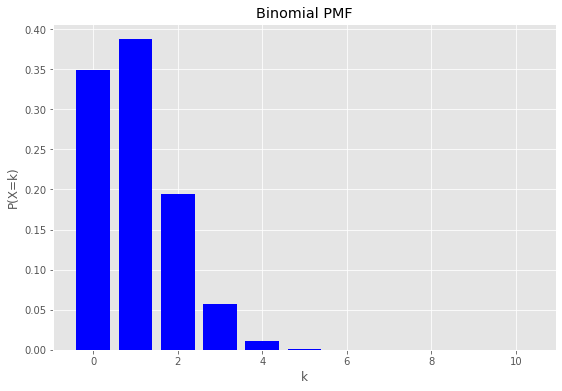

In [12]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

plt.figure(figsize=(9,6))
plt.bar(range(11), [binom.pmf(x, 10, 0.1) for x in range(11)], color='blue')
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title('Binomial PMF')
plt.show()

Podemos ver que há uma chance quase insignificante de conseguir mais de 6 canhotos em um grupo aleatório de 10 pessoas.

## Roleta

Em uma roleta americana, existem 38 quadrados:

- 18 são pretos
- 18 são vermelhos
- 2 são verdes

Apostamos no preto 10 vezes seguidas, quais são as chances de ganhar mais da metade deles?

$
P(X \gt 5) = \sum_{i=6}^{10} \begin{equation*} 
\binom{10}{i} 
\end{equation*} \bigg(\dfrac{18}{38}\bigg)^i \bigg(1-\dfrac{18}{38}\bigg)^{n-i}
$

In [13]:
p = 18 / 38
sum([binom.pmf(x, 10, p) for x in range(6, 11)])

0.31412504396776203

$P(X>5)=0.314$

## Distribuição de Poisson

Uma distribuição de Poisson é uma versão limitadora da distribuição binomial, em que $n$ se torna grande e $np$ aproxima de algum valor $\lambda$, no qual é o valor médio.

A distribuição Poisson pode ser usada para o número de eventos em outros intervalos especificados, como distância, área ou volume. Exemplos que podem seguir um Poisson incluem o número de chamadas telefônicas recebidas por uma central de atendimento por hora e o número de eventos de deterioração por segundo de uma fonte radioativa.

Ela é calculada como:

$P(k) = e^{-\lambda} \dfrac{\lambda^k}{k!}$

O número médio de gols em uma partida de futebol da Copa do Mundo é 2,5.

Gostaríamos de saber a probabilidade de 4 gols em uma partida.

In [14]:
from math import exp

_lambda = 2.5
k = 4

In [15]:
(exp(-_lambda)) * _lambda ** k / factorial(k)

0.13360188578108528

Novamente, o scipy possui funções integradas para executarmos esse cálculo e podemos usá-lo para calcular a probabilidade de qualquer número de gols em uma partida da Copa do Mundo.

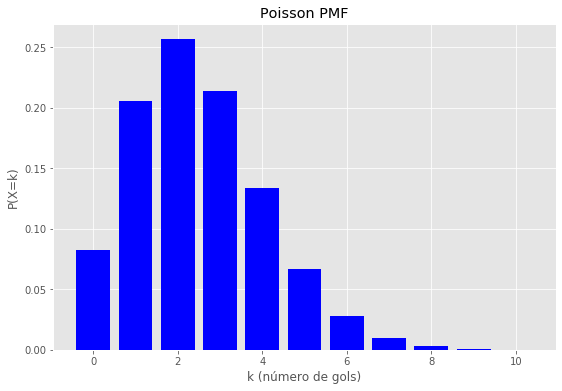

In [19]:
# parâmetros são k e lambda
from scipy.stats import poisson
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,6))
plt.bar(range(11), [poisson.pmf(k, _lambda) for k in range(11)], color='blue')
plt.xlabel('k (número de gols)')
plt.ylabel('P(X=k)')
plt.title('Poisson PMF')
plt.show()